In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("winequality-white.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.shape

(4898, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

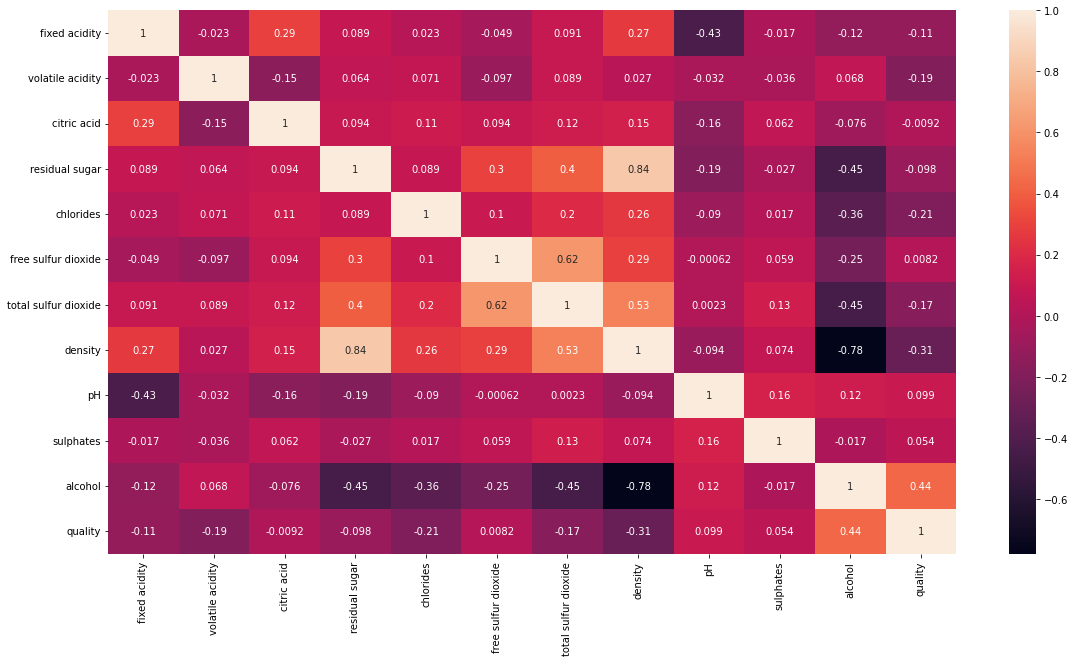

In [7]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(df.corr(),annot=True)

In [8]:
X=df.drop(columns=['free sulfur dioxide','total sulfur dioxide','quality'])
y=df['quality']

In [9]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,0.98869,3.34,0.38,12.8


In [10]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

C:\Users\asus\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\asus\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\asus\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\asus\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\asus\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [12]:
y.value_counts()

6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

In [13]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# train the model
model.fit(x_train, y_train)
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 88.06862490252144


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

In [15]:
k=model.predict(x_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,k)

In [24]:
import pickle

In [27]:
pickle.dump(model,open('wine_quality_predictor.pkl','wb'))

In [ ]:
df.to_csv('Cleaned_Car.csv')